# Import liberaries

In [2]:
# !pip install minisom
# !pip install sklearn
# !pip install sklearn-som
# !pip install yellowbrick
# !pip install plotly.express
import warnings
warnings.filterwarnings('ignore')

In [476]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
# from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn_som.som import SOM
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve
from sklearn.decomposition import PCA
plt.rcParams["figure.figsize"] = (9,6)


# 1. Use scikit-learn to implement Logistic Regression ( LR ) and K-Nearest Neighbor ( KNN) classifiers

## -make sure to use the first 576 rows (75%) for training and the remaining 192 rows (25%) for testing.

In [261]:


#============= Read CSV and apply data preperation =============#
df = pd.read_csv("Assignment3_dataset.csv")
data=df.iloc[:,:-1]
target=df['Outcome']
X = np.array(data)
Y= np.array(target)

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## (a) Provide the accuracy of LR and K-NN classifier as baseline performances.

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
evaluation_LR = accuracy_score(y_test, predictions)
print(evaluation_LR)

0.765625


In [265]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
 
knn.fit(x_train, y_train)
 
# Predict on dataset which model has not seen before

KNN_pred=knn.predict(x_test)
evaluation_KNN = accuracy_score(y_test, KNN_pred)
evaluation_KNN

0.71875

## (b) Provide 2D TSNE plots, one for the training set and one for the test set.

In [270]:
def draw_Tsne(x,y, title = "training data"):
  
  data=x                               
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data)  

  #plot tsne for x_test and x_train
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  # plt.figure(figsize=(6, 5))
  colors = 'r', 'g'
  for i, c, label in zip(target_ids, colors, classes):
    plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
  
  plt.title(title)
  plt.legend()
  plt.show()

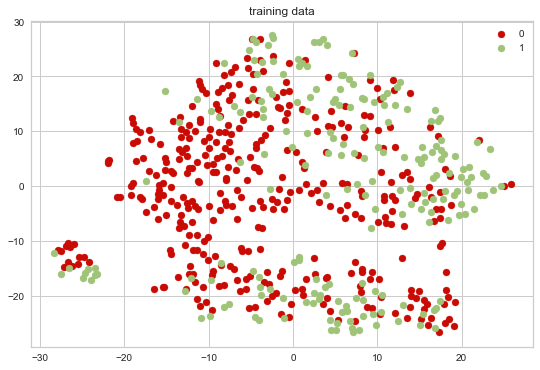

In [271]:
draw_Tsne(x_train,y_train,title="training data")

TNSE for Testing

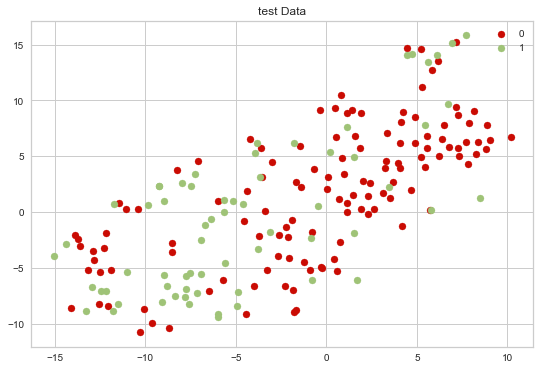

In [272]:
draw_Tsne(x_test,y_test,title = "test Data")

# 2. Choose the best number of cluster for k-means clustering algorithm

## (a) Plot the silhouette score vs the number of clusters.

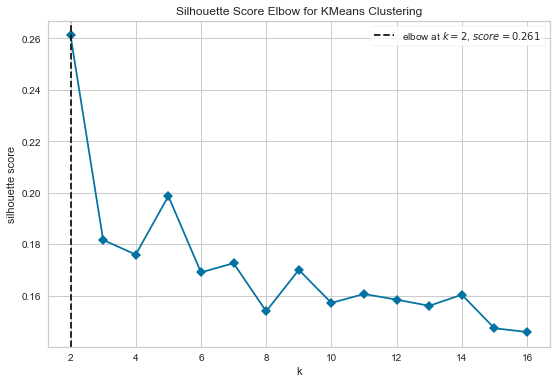

In [275]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), X, k=(2,17),metric='silhouette',timings=False)  

pass

So the best K = 2 , slihouette score 0.261

For n_clusters = 2 The average silhouette_score is : 0.26114611150604655
For n_clusters = 3 The average silhouette_score is : 0.18151103414798983
For n_clusters = 4 The average silhouette_score is : 0.20808119301398584
For n_clusters = 5 The average silhouette_score is : 0.20075741354829582


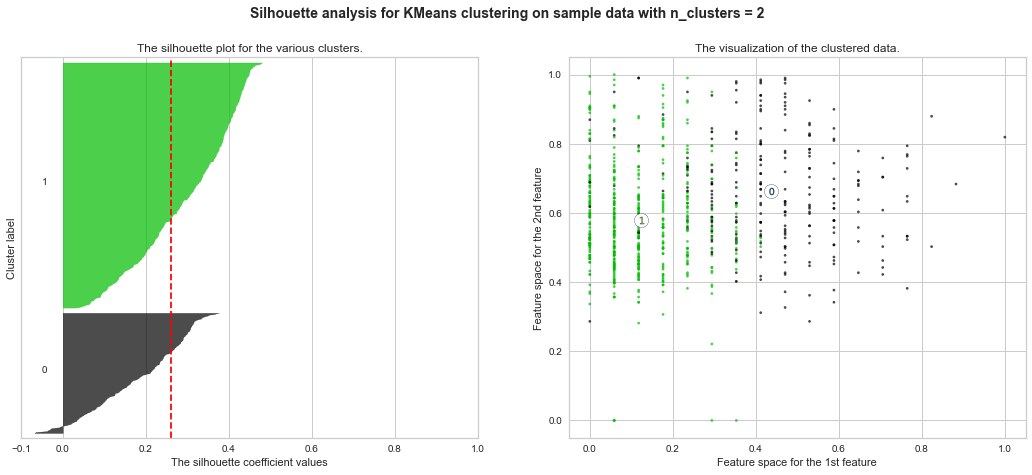

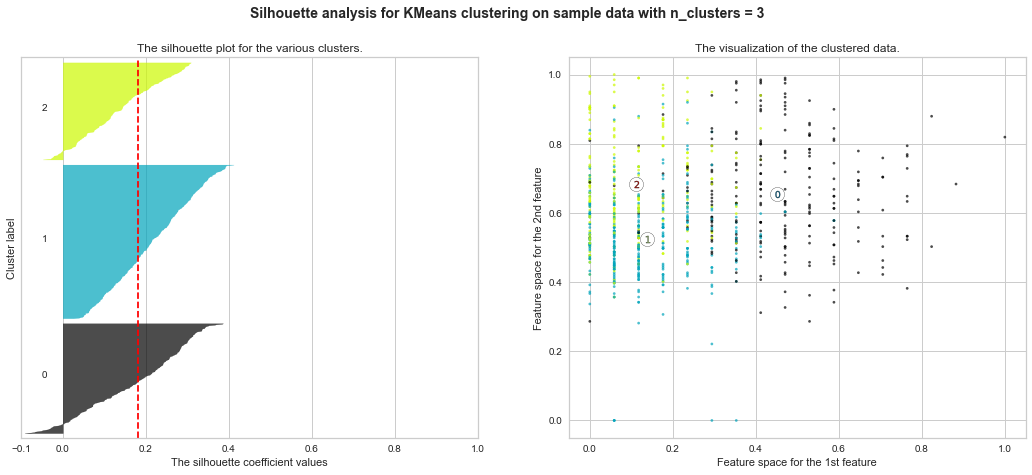

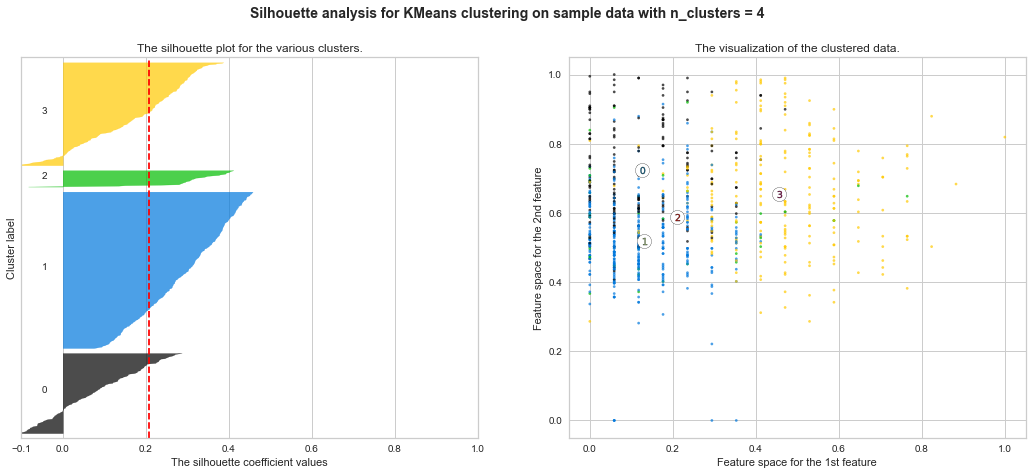

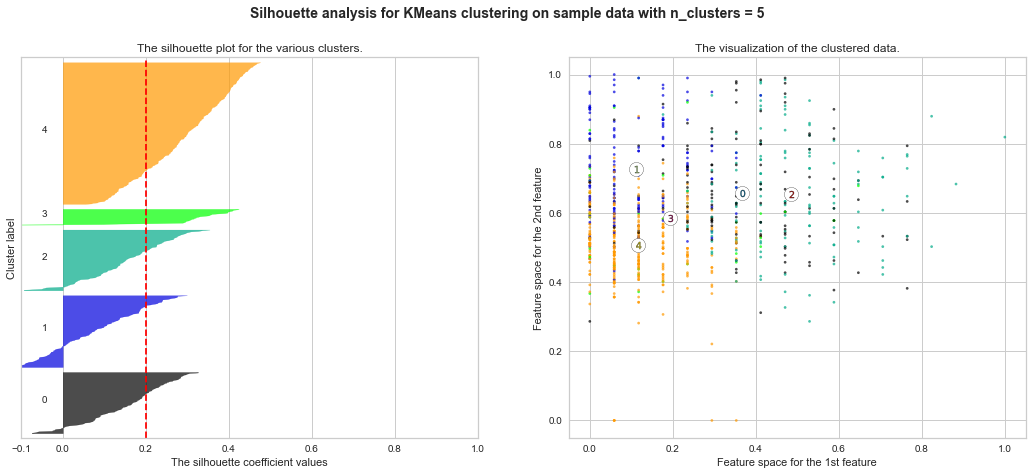

In [276]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## (b) Determine the optimal number of clusters for k-Means

- the optimal number of clusters is 2 for k means

## (c) Plot the clustered data with optimum number of clusters.

<AxesSubplot:>

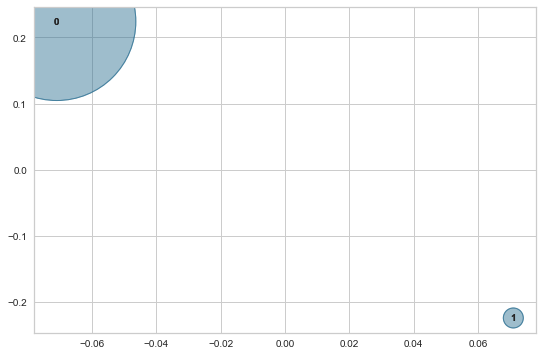

In [482]:
model_kmean = KMeans(2,random_state=0)
visualizer = InterclusterDistance(model_kmean,random_state=0)
visualizer.fit(X)        
visualizer.draw()

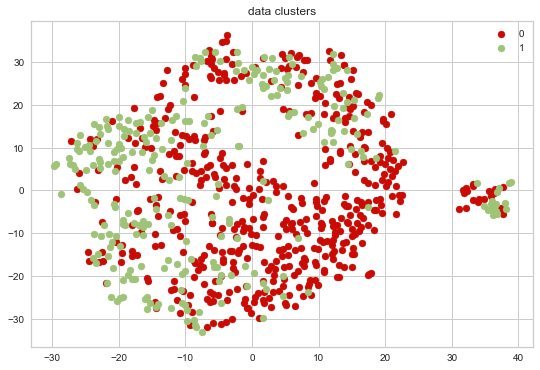

In [483]:
draw_Tsne(X,Y,"data clusters")

# 3. Apply the following Dimensionality Reduction (DR) methods: PCA(n components=n, random state=0)

## (a) Find the best value of n components, based on test accuracies, for both classifiers (LR and K-NN).

## (b) Plot the Number of Components-Accuracy graph with baseline performances for each classifier

## (c) Provide 2D TSNE plots, one for the training set and one for the test set.

In [344]:
def pca_evaluate(model,baseline,label = "KNN"):
  accuraceis= []
  my_range= range(1, 9)
  best_acc = 0
  best_n = 1
  data = ()
  for n_comp in my_range:    
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
    model.fit(X_train_pca, y_train_pca)
    y_predict_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test_pca, y_predict_pca)
    accuraceis.append(acc_pca)
    if acc_pca> best_acc:
      best_acc = acc_pca
      best_n = n_comp
      data = (X_train_pca, X_test_pca, y_train_pca, y_test_pca)

  
  print("Maximum accuracy:", best_acc)
  print("Best number of n_components:", best_n)

  plt.bar(my_range,accuraceis,label = label)
  plt.bar([8],[baseline], color = "green",label = "baseLine")
  plt.ylim(0,1)
  Title = "PCA Method to reduce feature dimension"
  plt.title(Title, fontsize=16)
  plt.xlabel("Number of Components", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)
  plt.legend()
  plt.show()
  return data, best_acc,best_n


Maximum accuracy: 0.7604166666666666
Best number of n_components: 6


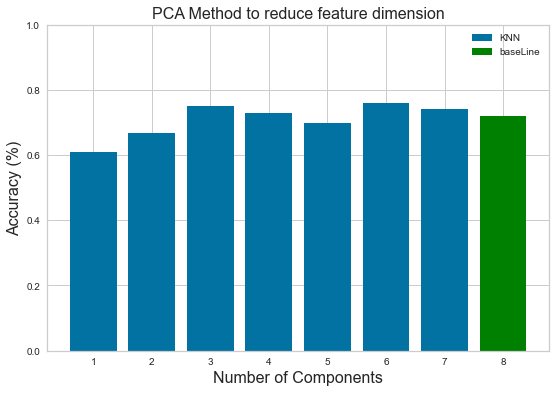

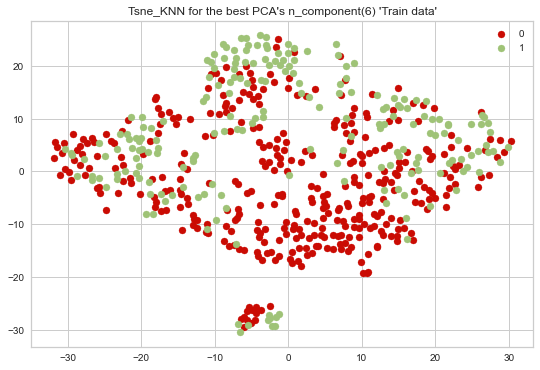

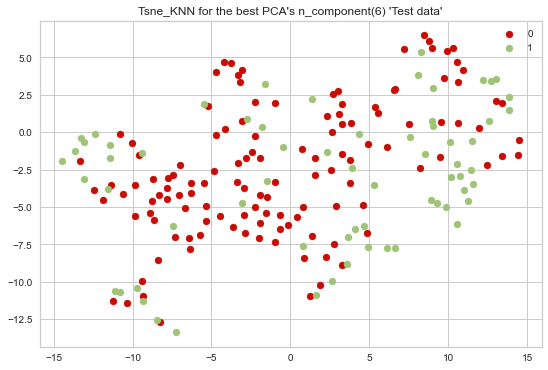

In [345]:
KNN_pca_transformed_data , KNN_pca_score, KNN_pca_n = pca_evaluate(KNeighborsClassifier(),evaluation_KNN,label = "KNN")
X_train_pca, X_test_pca, y_train_pca, y_test_pca = KNN_pca_transformed_data
draw_Tsne(X_train_pca,y_train_pca, title=f"Tsne_KNN for the best PCA's n_component({KNN_pca_n}) 'Train data'")
draw_Tsne(X_test_pca,y_test_pca, title=f"Tsne_KNN for the best PCA's n_component({KNN_pca_n}) 'Test data'")

Maximum accuracy: 0.765625
Best number of n_components: 7


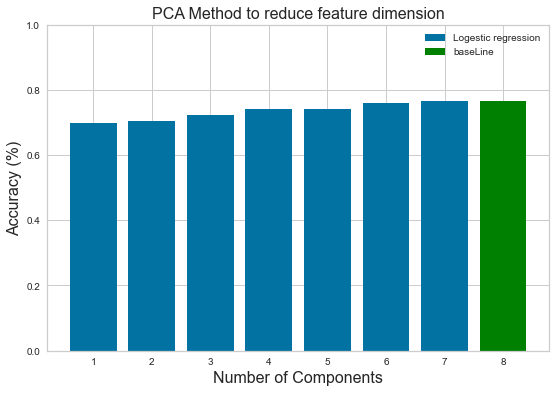

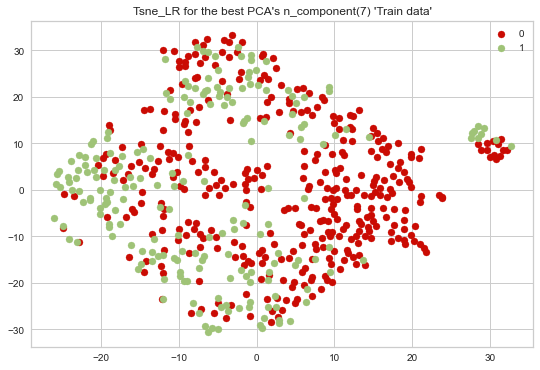

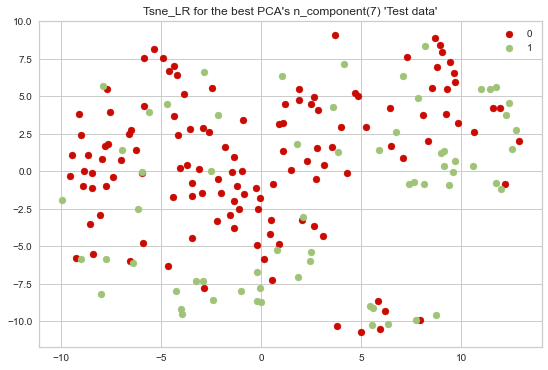

In [346]:
LR_pca_transformed_data, LR_pca_score, LR_pca_n = pca_evaluate(LogisticRegression(random_state=0),evaluation_LR,label = "Logestic regression")
X_train_pca, X_test_pca, y_train_pca, y_test_pca = LR_pca_transformed_data
draw_Tsne(X_train_pca,y_train_pca, title=f"Tsne_LR for the best PCA's n_component({LR_pca_n}) 'Train data'")
draw_Tsne(X_test_pca,y_test_pca, title=f"Tsne_LR for the best PCA's n_component({LR_pca_n}) 'Test data'")

# 4. Use the following Feature Selection methods (one for each method). Find the best
number of features based on both, the LR and K-NN classifiers’ test accuracies.

- Setting the improved baseline from the previouse step

In [389]:
evaluation_KNN = KNN_pca_score
evaluation_LR = LR_pca_score
KNN_imp_baseline_location = KNN_pca_n
LR_imp_baseline_location = LR_pca_n


## (a) Filter Methods with Information gain and ANOVA

In [347]:
def KNN_model(x_train_new, x_test_new, y_train_new, y_test_new):
  kNN = KNeighborsClassifier()
  kNN.fit(x_train_new, y_train_new)
  # Predict on dataset which model has not seen before
  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)
  return acc_knn


In [350]:
def LogReg(x_train_new, x_test_new, y_train_new, y_test_new ):
  
  LR=LogisticRegression(random_state=0)
  
  LR.fit(x_train_new, y_train_new)
  
  predictions = LR.predict(x_test_new)
  # print(len(predictions))
  # print(len(y_test_new))
  acc_LR = accuracy_score(y_test_new, predictions)
  return acc_LR


In [355]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
def feature_selection(model,X_teain,y_train, feature_selection_method = f_classif, range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  best_accuracy =0 
  data =()
  
  for i in n_features:
    feature_selection = SelectKBest(feature_selection_method, k= i)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
    acc= model(x_train_new, x_test_new, y_train_new, y_test_new)
    # LR_accuracies.append(acc_LR)
    accuracies.append(acc)
    if acc> best_accuracy:
      best_accuracy = acc
      best_i = i
      data = (x_train_new, x_test_new, y_train_new, y_test_new)
      best_f_model = feature_selection

  return accuracies,best_accuracy,best_i,data,best_f_model

### First KNN

In [455]:
n_features = range(1,len(df.columns))
KNN_ANOVA_accuracies,KNN_max_accuracy_anova,KNN_ANOVA_best_i ,KNN_ANOVA_transformed_data, KNN_ANOVA_feature_selection_model= feature_selection(KNN_model,X,Y, feature_selection_method= f_classif, range=n_features )
KNN_INFO_GAIN_accuracies ,KNN_max_accuracy_info, KNN_INFO_GAIN_best_i,KNN_INFO_GAIN_transformed_data, KNN_INFO_GAIN_feature_selection_model= feature_selection(KNN_model,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

KNN_ANOVA_accuracies:  [0.7395833333333334, 0.7395833333333334, 0.7291666666666666, 0.6979166666666666, 0.734375, 0.7395833333333334, 0.7447916666666666, 0.71875]
KNN_INFO_GAIN_accuracies:  [0.7395833333333334, 0.7395833333333334, 0.7552083333333334, 0.6979166666666666, 0.75, 0.7395833333333334, 0.71875, 0.71875]
maximum score with anova = 0.7447916666666666 , and the number of features = 7
maximum score with Information Gain = 0.7552083333333334 , and the number of features = 3
---------------------------------------------------------------------------------------
the best Method is Information Gain with accuracy = 0.7552083333333334 
the number of features = 3


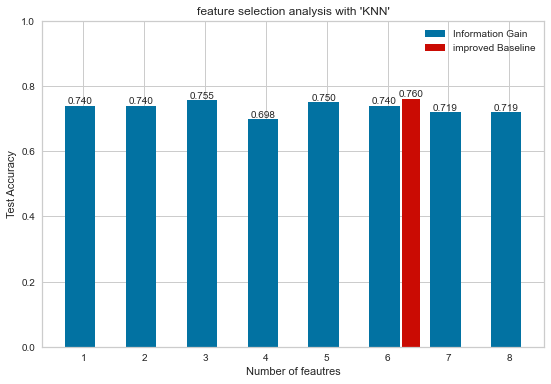

In [456]:
print("KNN_ANOVA_accuracies: ",KNN_ANOVA_accuracies)
print("KNN_INFO_GAIN_accuracies: ",KNN_INFO_GAIN_accuracies)
# def evaluate_plot(n_features, accuracies1, accuracies2, max_accuracy_1, max_accuracy_2, baseLine1, baseLine2,baseLine1_n, baseLine2_n, name1 ="ANOVA",name2 = "Information Gain"):

max_accuracy_anova = KNN_max_accuracy_anova
max_accuracy_info = KNN_max_accuracy_info

print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {KNN_ANOVA_best_i}')
print(f'maximum score with Information Gain = {max_accuracy_info} , and the number of features = {KNN_INFO_GAIN_best_i}')
print("---------------------------------------------------------------------------------------")
indexes = np.array(n_features)-0.3


max = max_accuracy_info
if max< max_accuracy_anova or (max== max_accuracy_anova and KNN_ANOVA_best_i <= KNN_INFO_GAIN_best_i):
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {KNN_ANOVA_best_i}")
    bar_1=plt.bar(indexes,KNN_ANOVA_accuracies,label="ANOVA",align="edge",width=.5)
    bar_2 = plt.bar(KNN_imp_baseline_location+.23,evaluation_KNN,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f',)
    plt.bar_label(bar_2, fmt='%.3f')   
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {KNN_INFO_GAIN_best_i}")
    bar_1 =plt.bar(indexes,KNN_INFO_GAIN_accuracies,label="Information Gain",align="edge",width=.5)
    bar_2 = plt.bar(KNN_imp_baseline_location+.23,evaluation_KNN,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f')
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondely with LR

In [461]:
n_features = range(1,len(df.columns)-1)
LR_ANOVA_accuracies, LR_max_accuracy_anova,LR_ANOVA_best_i ,LR_ANOVA_transformed_data, LR_ANOVA_feature_selection_model = feature_selection(LogReg,X,Y, feature_selection_method= f_classif, range=n_features )
LR_INFO_GAIN_accuracies, LR_max_accuracy_info,LR_INFO_GAIN_best_i ,LR_INFO_GAIN_transformed_data, LR_INFO_GAIN_feature_selection_model = feature_selection(LogReg,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

LR_ANOVA_accuracies:  [0.7760416666666666, 0.7708333333333334, 0.7864583333333334, 0.78125, 0.78125, 0.78125, 0.7604166666666666]
LR_INFO_GAIN_accuracies:  [0.7760416666666666, 0.7708333333333334, 0.7864583333333334, 0.78125, 0.7864583333333334, 0.765625, 0.7604166666666666]
maximum score with anova = 0.7864583333333334 , and the number of features = 3
maximum score with information gain = 0.7864583333333334 , and the number of features = 3
---------------------------------------------------------------------------------------
the best Method is Information Gain with accuracy = 0.7864583333333334 
the number of features = 3


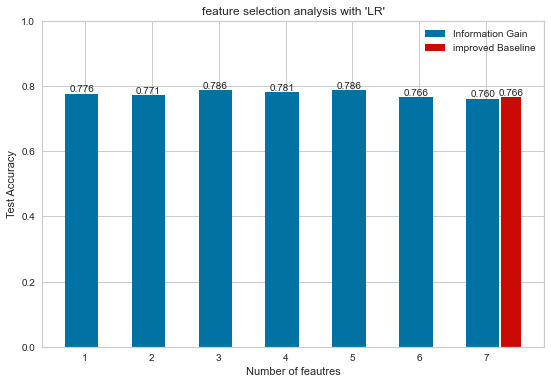

In [462]:
print("LR_ANOVA_accuracies: ",LR_ANOVA_accuracies)
print("LR_INFO_GAIN_accuracies: ",LR_INFO_GAIN_accuracies)
max_accuracy_anova = LR_max_accuracy_anova
max_accuracy_info = LR_max_accuracy_info
print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {LR_ANOVA_best_i}')
print(f'maximum score with information gain = {max_accuracy_info} , and the number of features = {LR_INFO_GAIN_best_i}')
print("---------------------------------------------------------------------------------------")

indexes = np.array(n_features)-0.3
max = max_accuracy_info

if max< max_accuracy_anova or (max== max_accuracy_anova and LR_ANOVA_best_i < LR_INFO_GAIN_best_i):
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {LR_ANOVA_best_i}")
    bar_1 = plt.bar(indexes,LR_ANOVA_accuracies,label="ANOVA",align="edge",width=.5)
    bar_2 = plt.bar(LR_imp_baseline_location+.23,evaluation_LR,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f')
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {LR_INFO_GAIN_best_i}")
    bar_1 = plt.bar(indexes,LR_INFO_GAIN_accuracies,label="Information Gain",align="edge",width=.5)
    bar_2 = plt.bar(LR_imp_baseline_location+.23,evaluation_LR,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f')
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (b) Wrapper Methods (Forward Feature Elimination, Recursive Feature Elimination).

In [380]:
# from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
def fs_wrapper_method(model,testModel,X_teain,y_train, direction = "forward", range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  best_accuracy =0 
  data =()
  for i in n_features:
    feature_selection = SequentialFeatureSelector(model, n_features_to_select=i,direction=direction)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc = feature_selection.score(x_test_new,y_test_new)
    acc= testModel(x_train_new, x_test_new, y_train_new, y_test_new)
    accuracies.append(acc)
    if acc> best_accuracy:
      best_accuracy = acc
      best_i = i
      data = (x_train_new, x_test_new, y_train_new, y_test_new)
      best_f_model = feature_selection

  return accuracies,best_accuracy,best_i,data,best_f_model

### First KNN

In [460]:
n_features = range(1,len(df.columns)-1)
KNN_back_accuracies, KNN_max_accuracy_back,KNN_back_best_i ,KNN_back_transformed_data, KNN_back_wrapper_model= fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = "backward", range=n_features )
KNN_forward_accuracies,KNN_max_accuracy_forward,KNN_forward_best_i ,KNN_forward_transformed_data, KNN_forward_wrapper_model = fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = 'forward', range=n_features)

KNN_back_accuracies:  [0.7395833333333334, 0.7395833333333334, 0.7239583333333334, 0.75, 0.7552083333333334, 0.7395833333333334, 0.78125]
KNN_forward_accuracies:  [0.7395833333333334, 0.6979166666666666, 0.6979166666666666, 0.7135416666666666, 0.7083333333333334, 0.7135416666666666, 0.78125]
maximum score with backword selection = 0.78125 , and the number of features = 7
maximum score with forward selection = 0.78125 , and the number of features = 7
---------------------------------------------------------------------------------------
the best Method is backword selection with accuracy = 0.78125 
the number of features = 7


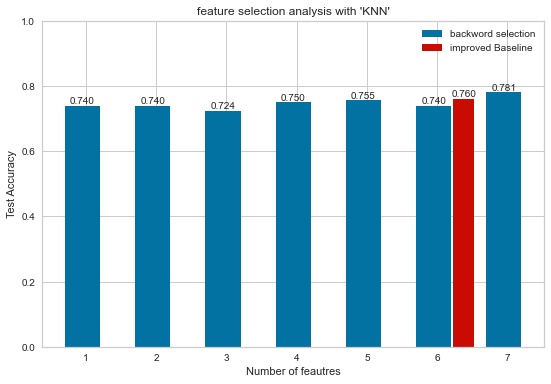

In [463]:

print("KNN_back_accuracies: ",KNN_back_accuracies)
print("KNN_forward_accuracies: ",KNN_forward_accuracies)

max_accuracy_back = KNN_max_accuracy_back
max_accuracy_forward = KNN_max_accuracy_forward

print(f'maximum score with backword selection = {max_accuracy_back} , and the number of features = {KNN_back_best_i}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {KNN_forward_best_i}')
print("---------------------------------------------------------------------------------------")
indexes = np.array(n_features)-0.3

max = max_accuracy_forward
if max< max_accuracy_back or (max== max_accuracy_back and KNN_back_best_i <= KNN_forward_best_i):
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {KNN_back_best_i}")
    bar_1 = plt.bar(indexes,KNN_back_accuracies,label="backword selection",align="edge",width=.5)
    bar_2 = plt.bar(KNN_imp_baseline_location+.23,evaluation_KNN,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f',)
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection with accuracy = {max} \nthe number of features = {KNN_forward_best_i}")
    bar_1 = plt.bar(indexes,KNN_forward_accuracies,label="forward selection",align="edge",width=.5)
    bar_2 = plt.bar(KNN_imp_baseline_location+.23,evaluation_KNN,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f',)
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondly with LR

In [464]:
# n_features = range(1,len(df.columns)-1)
LR_back_accuracies, LR_max_accuracy_back,LR_back_best_i ,LR_back_transformed_data, LR_back_wrapper_model= fs_wrapper_method(LogisticRegression(random_state=0),LogReg,X,Y, direction = "backward", range=n_features )
LR_forward_accuracies,LR_max_accuracy_forward,LR_forward_best_i ,LR_forward_transformed_data, LR_forward_wrapper_model= fs_wrapper_method(LogisticRegression(random_state=0),LogReg,X,Y, direction = "forward", range=n_features)

LR_back_accuracies:  [0.7760416666666666, 0.7708333333333334, 0.7760416666666666, 0.8020833333333334, 0.8072916666666666, 0.78125, 0.765625]
LR_forward_accuracies:  [0.7760416666666666, 0.7708333333333334, 0.7760416666666666, 0.8020833333333334, 0.8072916666666666, 0.8072916666666666, 0.78125]
maximum score with backword selection = 0.8072916666666666 , and the number of features = 5
maximum score with forward selection = 0.8072916666666666 , and the number of features = 5
---------------------------------------------------------------------------------------
the best Method is backword selection with accuracy = 0.8072916666666666 
the number of features = 5


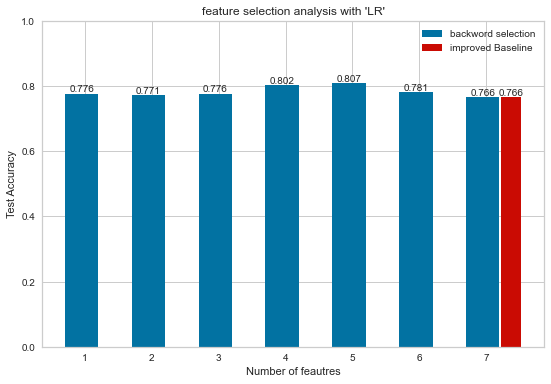

In [465]:

print("LR_back_accuracies: ",LR_back_accuracies)
print("LR_forward_accuracies: ",LR_forward_accuracies)

max_accuracy_back = LR_max_accuracy_back
max_accuracy_forward = LR_max_accuracy_forward

print(f'maximum score with backword selection = {max_accuracy_back} , and the number of features = {LR_back_best_i}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {LR_forward_best_i}')
print("---------------------------------------------------------------------------------------")
indexes = np.array(n_features)-0.3

max = max_accuracy_forward
if max< max_accuracy_back or (max== max_accuracy_back and LR_back_best_i <= LR_forward_best_i):
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {LR_back_best_i}")
    bar_1 = plt.bar(indexes,LR_back_accuracies,label="backword selection",align="edge",width=.5)
    bar_2 = plt.bar(LR_imp_baseline_location+.23,evaluation_LR,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f',)
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection with accuracy = {max} \nthe number of features = {LR_forward_best_i}")
    bar_1 = plt.bar(indexes,LR_forward_accuracies,label="forward selection",align="edge",width=.5)
    bar_2 = plt.bar(LR_imp_baseline_location+.23,evaluation_LR,label="improved Baseline",color ="r",align="edge",width=.3)
    plt.bar_label(bar_1, fmt='%.3f',)
    plt.bar_label(bar_2, fmt='%.3f')
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (c) Provide 2D TSNE plots, one for the training set and one for the test set, using
only the best method (either the filter or wrapper). 

### the best for KNN is the Wrapper Method withg Backward Feature Elimination

the best Method is backword selection with accuracy = 0.78125 
the number of features = 7

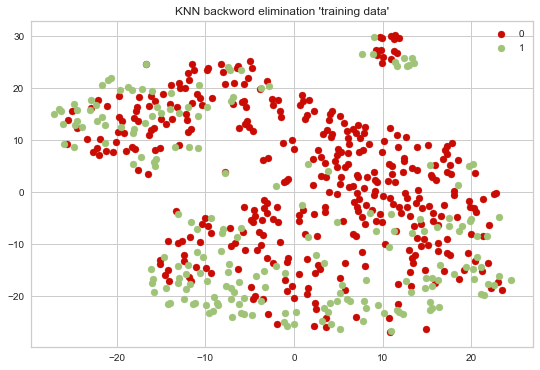

In [467]:
x_train_new, x_test_new, y_train_new, y_test_new = KNN_back_transformed_data
# print("training data")
draw_Tsne(x_train_new,y_train_new,title= "KNN backword elimination 'training data'")

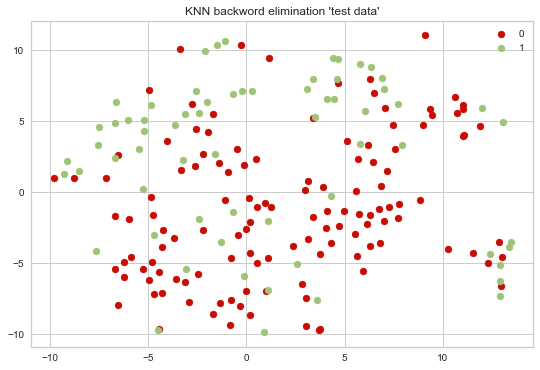

In [468]:
draw_Tsne(x_test_new,y_test_new,title= "KNN backword elimination 'test data'")

### the best for LR is the Wrapper Method withg Backward Feature Elimination

the best Method is backword selection with accuracy = 0.8072916666666666 
the number of features = 5


training data


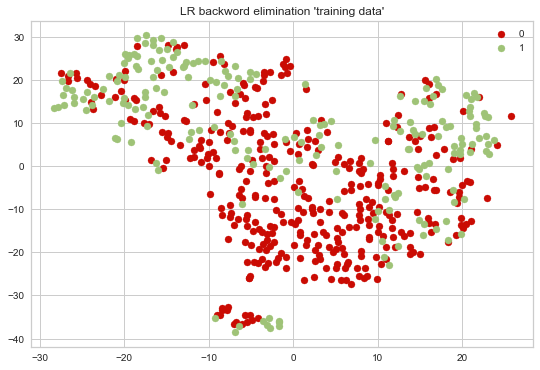

In [469]:
x_train_new, x_test_new, y_train_new, y_test_new = LR_back_transformed_data
print("training data")
draw_Tsne(x_train_new,y_train_new,title= "LR backword elimination 'training data'")

test data


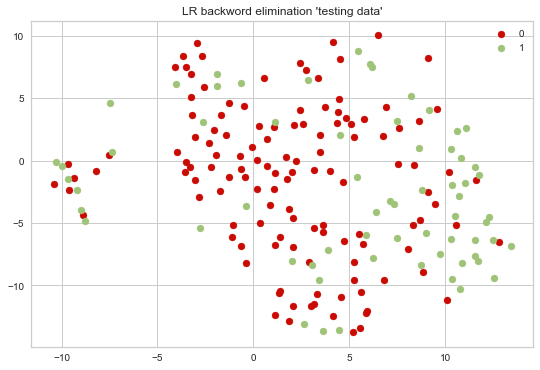

In [470]:
print("test data")
draw_Tsne(x_test_new,y_test_new,title= "LR backword elimination 'testing data'")

# 5. Choose the best number of cluster for k-means clustering algorithm on the processed
data, using the best features from Q3 or best number of dimensionality Q4.

## (a) Plot the silhouette score vs the number of clusters

### FROM Q4 the best number of dimentions are 5 with LR

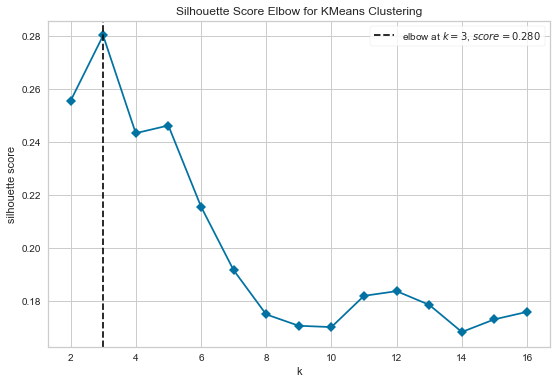

In [472]:
from yellowbrick.cluster.elbow import kelbow_visualizer
x_train_new, x_test_new, y_train_new, y_test_new = LR_back_transformed_data
X_train = np.concatenate((x_train_new,x_test_new),axis=0)
y_train = np.concatenate((y_train_new, y_test_new),axis=0)
model = kelbow_visualizer(KMeans(random_state=0),X_train, k=(2,17),metric='silhouette',timings=False)  

pass

with 5 features the best K = 3 that gives the highest silhouette score

# 6. Choose the best number of neurons for SOM algorithm, using the best features from
Q3 or best number of dimensionality Q4. You might find it easier if you use the
MiniSom library.

- LR -> the best Method is backword selection with accuracy = 0.8072916666666666 <br>
the number of features = 5


In [473]:
x_train_new, x_test_new, y_train_new, y_test_new = LR_back_transformed_data
X_train = np.concatenate((x_train_new,x_test_new),axis=0)
y_train = np.concatenate((y_train_new, y_test_new),axis=0)


In [ ]:
!pip install minisom
!pip install sklearn-som

In [474]:
from minisom import MiniSom
from sklearn_som.som import SOM


## (a) Plot the silhouette score vs the number of neurons (max 30 neurons)
## (b) Determine the optimal number of neurons for SOM

the best Silhouette Score= 0.21836682545149846 ,num of nearons = 2


<function matplotlib.pyplot.show(close=None, block=None)>

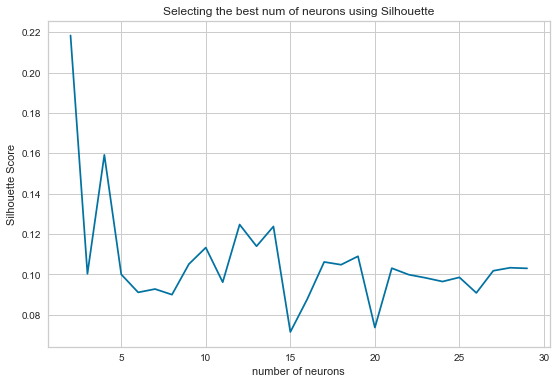

In [477]:
n_range=range(2,30)
dim= X_train.shape[1]
silhouette_socres = []
max_score =0
best_n = 2
for i in n_range:
  model= SOM(m=i , n=1, dim=dim)
  predClusters = model.fit_predict(X_train)
  score = silhouette_score(X_train, predClusters, random_state=0)
  silhouette_socres.append(score)
  if max_score<score:
    max_score = score
    best_n = i 

#plot number of neurons/number of clusters vs inertia score
print (f'the best Silhouette Score= {max_score} ,num of nearons = {best_n}')
plt.plot(n_range,silhouette_socres)
plt.title("Selecting the best num of neurons using Silhouette")
plt.xlabel("number of neurons")
plt.ylabel("Silhouette Score")
plt.show


## (c) Plot the initial and final Neuron positions

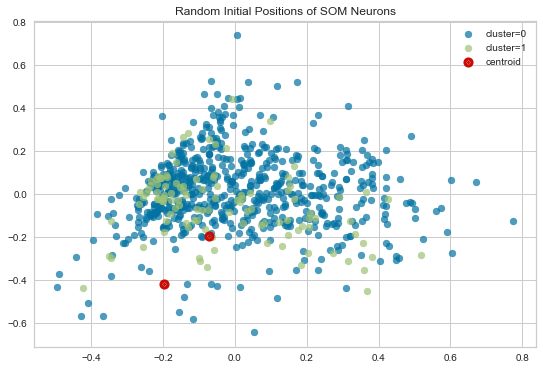

In [478]:
som_shape = (1, best_n)
data = X_train
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# just for plotting
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data_pca[cluster_index == c, 0],
                data_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    centroid = pca.transform(centroid)
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='o', 
                s=10, linewidths=7, color='r', label='centroid')
plt.title("Random Initial Positions of SOM Neurons")
plt.legend()
plt.show()

In [479]:
# traininf SOM
som.train_batch(data, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2783139943225902


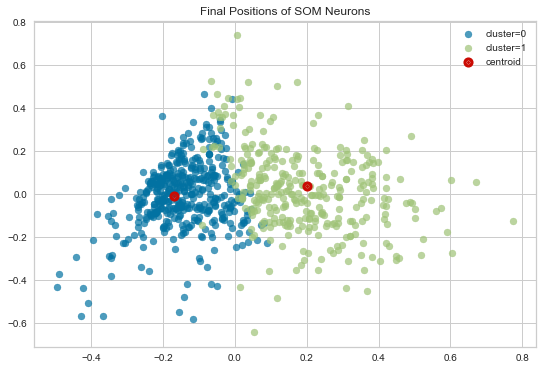

In [480]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data_pca[cluster_index == c, 0],
                data_pca[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    centroid = pca.transform(centroid)
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='o', 
                s=10, linewidths=7, color='r', label='centroid')
plt.title("Final Positions of SOM Neurons")
plt.legend()
plt.show()